In [1]:
import read
import cartesian
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S_filename='/Users/meredith/Files_Python_QUICC/CosXCos3Z/state0000.hdf5'
P_filename='/Users/meredith/Files_Python_QUICC/CosXCos3Z/visState0000.hdf5'

file_S='/Users/meredith/scratch/build_latest/st_Ra40Pm05_NC.hdf5'

geometry = 'cartesian'

my_state = read.SpectralState(file_S,geometry)
my_state_Physical = read.PhysicalState(P_filename,geometry)

In [3]:
# Get parameter values
my_state.parameters.rayleigh

40.0

In [4]:
# Get fields
streamfunction = my_state.fields.streamfunction

In [5]:
# Get time stepping information
my_state.parameters.timestep
my_state.parameters.time

# Grid information (spectral) 
my_state.specRes.N    # Chebsyshev in vertical direction --- (use 3/2*(N+1) to get phys resolution)
my_state.specRes.kx   # wavenumbers in x --- (use 3/2 * (kx+1) to get phys resolution)
my_state.specRes.ky   # positive number of wavesnumbers in y direction --- (use 3/2 *2 * ky to get phys resolution)

64

In [6]:
# Get slices in each direction
field = 'velocityz'
zLevel = 0
sliceXY = cartesian.getHorizontalSlice(my_state,field, zLevel)

In [7]:
xLevel = np.pi
sliceYZ = cartesian.getVerticalSlice(my_state,field,'x', xLevel)

In [8]:
yLevel = 0
sliceXZ = cartesian.getVerticalSlice(my_state,field,'y',yLevel)

In [9]:
avg_field = cartesian.computeVerticalAverage(my_state,field)

In [12]:
[nx,ny] = avg_field.shape
avg_field = avg_field*nx*ny*2

<Figure size 432x288 with 0 Axes>

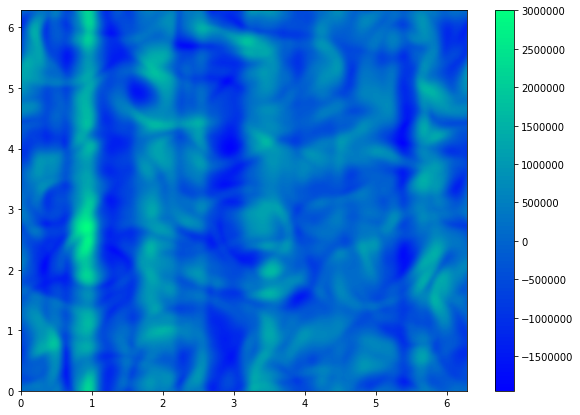

In [13]:
X  = np.linspace(0,2*np.pi, nx)
Y  = np.linspace(0,2*np.pi, ny)
XX, YY = np.meshgrid(X, Y)

fig = plt.figure()
plt.figure(figsize=(10,7))
#plt.imshow(np.real(real_field2.T),cmap = 'winter')
plt.contourf(XX,YY,avg_field.T,100, cmap = 'winter')
plt.colorbar()


In [ ]:
avg_field.max()

In [ ]:
Z = cartesian.makeChebyshevGrid(5)